In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [2]:
df = pd.read_csv('Data\\unicorn_companies.csv')
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [3]:
df.shape

(1074, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [5]:
df.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [6]:
df['Date Joined'] = pd.to_datetime(df['Date Joined'])
df['Year Joined'] = df['Date Joined'].dt.year
df.head()

C:\Users\asada\AppData\Local\Temp\ipykernel_2044\3978937299.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Joined'] = pd.to_datetime(df['Date Joined'])


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


In [7]:
def str_to_num(x):
    num = x.strip('$B')
    return int(num)

In [8]:
df['valuation_num'] = df['Valuation'].apply(str_to_num)

In [9]:
df.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
Year Joined          0
valuation_num        0
dtype: int64

In [10]:
mask = df.isna()
mask

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1069,False,False,False,False,False,False,False,False,False,False,False,False
1070,False,False,False,False,False,False,False,False,False,False,False,False
1071,False,False,False,False,False,False,False,False,False,False,False,False
1072,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
mask = mask.any(axis=1)
mask.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [12]:
df_missing_rows = df[mask]
df_missing_rows

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN,2015,1
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,2021-06-01,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


In [13]:
count_total = df.size
count_total

12888

In [14]:
count_dropna_rows = df.dropna().size
count_dropna_rows

12684

In [15]:
count_dropna_columns = df.dropna(axis=1).size
count_dropna_columns

10740

In [16]:
row_percent = ((count_total - count_dropna_rows) / count_total) * 100
print(f'Percentage removed, rows: {row_percent:.3f}')

col_percent = ((count_total - count_dropna_columns) / count_total) * 100
print(f'Percentage removed, columns: {col_percent:.3f}')

Percentage removed, rows: 1.583
Percentage removed, columns: 16.667


In [17]:
df_companies_backfill = df.fillna(method='backfill')

df_companies_backfill.iloc[df_missing_rows.index, :]

C:\Users\asada\AppData\Local\Temp\ipykernel_2044\228221980.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_companies_backfill = df.fillna(method='backfill')


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
12,FTX,$32B,2021-07-20,Fintech,Jacksonville,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,El Segundo,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,San Francisco,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,2019-07-22,Artificial intelligence,Amsterdam,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,2021-06-21,Fintech,San Francisco,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",San Francisco,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,Helsinki,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,"Sequoia Capital India, The Times Group, GMO Ve...",2015,1
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,New York,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,2021-06-01,Fintech,San Francisco,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


In [18]:
cities = ['Beijing', 'San Francisco', 'London']
mask = (
    (df['Industry']=='Hardware') & (df['City'].isin(cities))
) | (
    (df['Industry']=='Artificial intelligence') & (df['City']=='London')
)
df_invest = df[mask]
df_invest


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
36,Bitmain,$12B,2018-07-06,Hardware,Beijing,China,Asia,2015,$765M,"Coatue Management, Sequoia Capital China, IDG ...",2018,12
43,Global Switch,$11B,2016-12-22,Hardware,London,United Kingdom,Europe,1998,$5B,"Aviation Industry Corporation of China, Essenc...",2016,11
147,Chipone,$5B,2021-12-16,Hardware,Beijing,China,Asia,2008,$1B,"China Grand Prosperity Investment, Silk Road H...",2021,5
845,Density,$1B,2021-11-10,Hardware,San Francisco,United States,North America,2014,$217M,"Founders Fund, Upfront Ventures, 01 Advisors",2021,1
873,BenevolentAI,$1B,2015-06-02,Artificial intelligence,London,United Kingdom,Europe,2013,$292M,Woodford Investment Management,2015,1
923,Geek+,$1B,2018-11-21,Hardware,Beijing,China,Asia,2015,$439M,"Volcanics Ventures, Vertex Ventures China, War...",2018,1
1040,TERMINUS Technology,$1B,2018-10-25,Hardware,Beijing,China,Asia,2015,$623M,"China Everbright Limited, IDG Capital, iFLYTEK",2018,1
1046,Tractable,$1B,2021-06-16,Artificial intelligence,London,United Kingdom,Europe,2014,$120M,"Insight Partners, Ignition Partners, Georgian ...",2021,1


In [19]:
national_valuations = df.groupby(['Country/Region'])['valuation_num'].sum(
).sort_values(ascending=False).reset_index()
national_valuations.head(15)

,Country/Region,valuation_num
0,United States,1933
1,China,696
2,India,196
3,United Kingdom,195
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49
9,South Korea,41


In [20]:
national_valuations_no_big4 = national_valuations.iloc[4:, :]

national_valuations_no_big4.head()

,Country/Region,valuation_num
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49


In [22]:
mask = ~national_valuations['Country/Region'].isin(['United States', 'China', 'India', 'United Kingdom'])
national_valuations_no_big4 = national_valuations[mask]
national_valuations_no_big4.head()

,Country/Region,valuation_num
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49


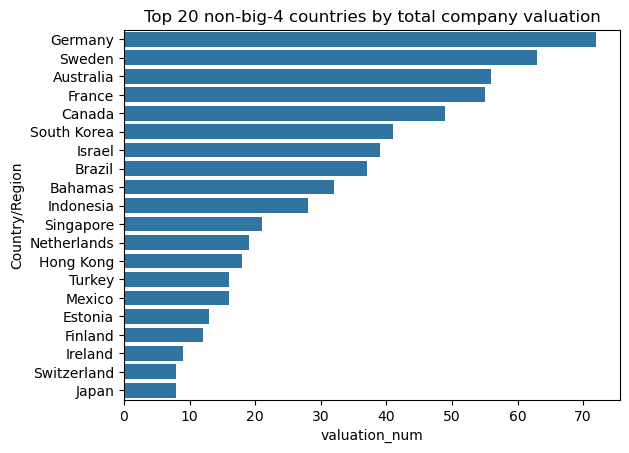

In [23]:
sns.barplot(data=national_valuations_no_big4.head(20),
            y='Country/Region',
            x='valuation_num')
plt.title('Top 20 non-big-4 countries by total company valuation')
plt.show();

In [24]:
data = national_valuations_no_big4

px.scatter_geo(data, 
               locations='Country/Region', 
               size='valuation_num', 
               locationmode='country names', 
               color='Country/Region',
               title='Total company valuations by country (non-big-four)')